### Explore Nearby Area of Toronto Downtown

Importing some of the important libraries for the assignment.

In [456]:
import pandas as pd
import numpy as np
import urllib.request

%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors

from sklearn.cluster import KMeans

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0
print('Folium installed')
print('Libraries imported.')

Solving environment: ...working... done

# All requested packages already installed.

Solving environment: ...working... done

# All requested packages already installed.

Matplotlib version:  3.1.3
Folium installed
Libraries imported.


Preprocessing the data

In [457]:
CLIENT_ID = 'GXXD1GVTUKJS0JBDMSG3WRXN2PNCEV34SNEQIJSI4HXEXMO4' # your Foursquare ID
CLIENT_SECRET = '40NUW1HKHJLRBGD5WOBR4SZRS3FBI4DB340YEGP1ELSP5QJ4' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: GXXD1GVTUKJS0JBDMSG3WRXN2PNCEV34SNEQIJSI4HXEXMO4
CLIENT_SECRET:40NUW1HKHJLRBGD5WOBR4SZRS3FBI4DB340YEGP1ELSP5QJ4


Creating a Toronto Map and then locating Toronto Neighborhoods on the Map. 

In [458]:
address = "Toronto, ON"

geolocator = Nominatim(user_agent="toronto_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto city are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto city are 43.6534817, -79.3839347.


In [459]:
# create map of Toronto using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=12)
map_toronto

Exploring the Neighborhood of Toronto, ON Canada

Getting the top 100 venues that are in the Neighborhood of Toronto, ON within a radius of 1 Km.

In [460]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
RADIUS = 1000 # defining radius
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, CLIENT_SECRET, VERSION, latitude, longitude, RADIUS, LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=GXXD1GVTUKJS0JBDMSG3WRXN2PNCEV34SNEQIJSI4HXEXMO4&client_secret=40NUW1HKHJLRBGD5WOBR4SZRS3FBI4DB340YEGP1ELSP5QJ4&v=20180604&ll=43.6534817,-79.3839347&radius=1000&limit=100'

In [461]:
# getting the result to a json file
results = requests.get(url).json()
'There are {} venues around Toronto, ON neighborhood.'.format(len(results['response']['groups'][0]['items']))

'There are 100 venues around Toronto, ON neighborhood.'

Getting the relevant part of the JSON

In [462]:
venues = results['response']['groups'][0]['items']
venues[0]

{'reasons': {'count': 0,
  'items': [{'summary': 'This spot is popular',
    'type': 'general',
    'reasonName': 'globalInteractionReason'}]},
 'venue': {'id': '5227bb01498e17bf485e6202',
  'name': 'Downtown Toronto',
  'location': {'lat': 43.65323167517444,
   'lng': -79.38529600606677,
   'labeledLatLngs': [{'label': 'display',
     'lat': 43.65323167517444,
     'lng': -79.38529600606677}],
   'distance': 113,
   'cc': 'CA',
   'city': 'Toronto',
   'state': 'ON',
   'country': 'Canada',
   'formattedAddress': ['Toronto ON', 'Canada']},
  'categories': [{'id': '4f2a25ac4b909258e854f55f',
    'name': 'Neighborhood',
    'pluralName': 'Neighborhoods',
    'shortName': 'Neighborhood',
    'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/neighborhood_',
     'suffix': '.png'},
    'primary': True}],
  'photos': {'count': 0, 'groups': []}},
 'referralId': 'e-0-5227bb01498e17bf485e6202-0'}

Processing JSON and converting it to clean dataframe

In [463]:
dataframe = json_normalize(venues) # flatten JSON

# Define the dataframe columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng', 'venue.location.distance']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venues
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['venue.categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean columns
dataframe_filtered.columns = [col.split('.')[-1] for col in dataframe_filtered.columns]

dataframe_filtered.head(12)

C:\Users\Krishno\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """Entry point for launching an IPython kernel.


,name,categories,lat,lng,distance
0,Downtown Toronto,Neighborhood,43.653232,-79.385296,113
1,Nathan Phillips Square,Plaza,43.652270,-79.383516,138
2,Indigo,Bookstore,43.653515,-79.380696,260
3,Chatime 日出茶太,Bubble Tea Shop,43.655542,-79.384684,237
4,Textile Museum of Canada,Art Museum,43.654396,-79.386500,230
5,LUSH,Cosmetics Shop,43.653557,-79.380400,284
6,UNIQLO ユニクロ,Clothing Store,43.655910,-79.380641,378
7,CF Toronto Eaton Centre,Shopping Mall,43.654540,-79.380677,287
8,Ed Mirvish Theatre,Theater,43.655102,-79.379768,380
9,Four Seasons Centre for the Performing Arts,Concert Hall,43.650592,-79.385806,355


In [464]:
dataframe_filtered.shape

(100, 5)

Number of unique categories that can be curated fom all the returned venues

In [465]:
print('There are {} uniques categories.'.format(len(dataframe_filtered['categories'].unique())))

There are 63 uniques categories.


In [466]:
df_Toronto = dataframe_filtered.groupby(['categories'], sort=True).size().sort_values(ascending = False).reset_index(name='Toronto')
df_Toronto

,categories,Toronto
0,Coffee Shop,11
1,Café,9
2,Restaurant,4
3,Japanese Restaurant,3
4,Gastropub,3
...,...,...
58,Spa,1
59,Gym / Fitness Center,1
60,Speakeasy,1
61,General Travel,1


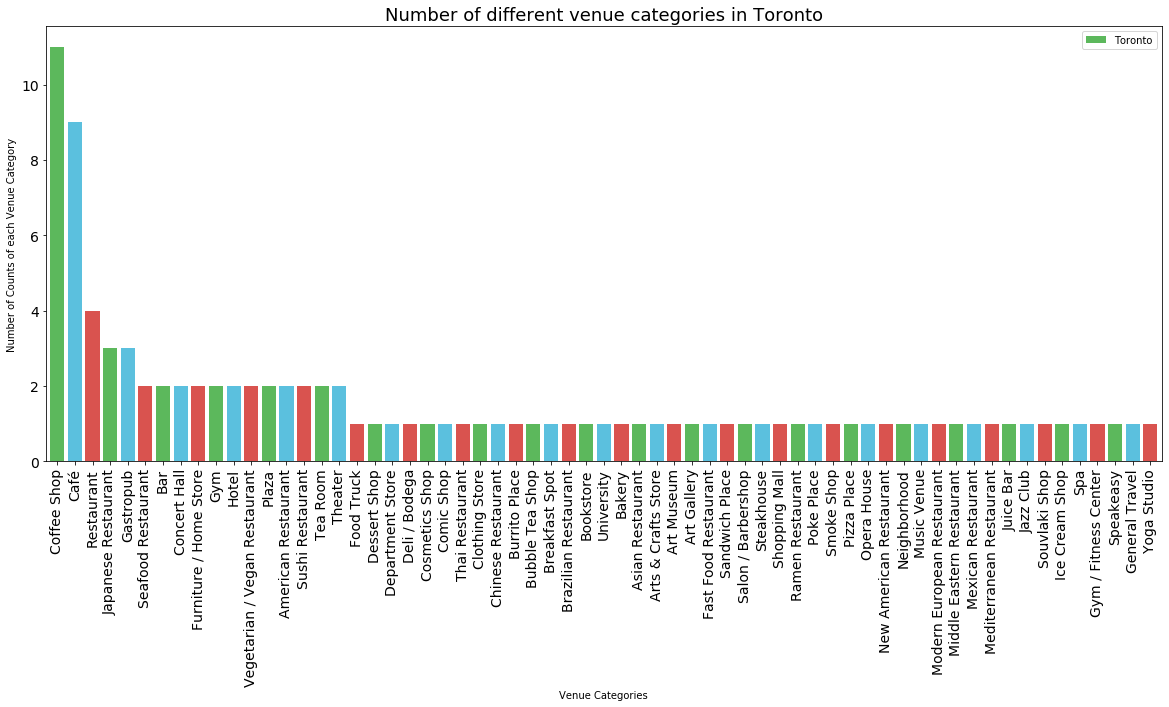

In [467]:
df_Toronto.plot(x = 'categories',
                 y = 'Toronto',
                 kind='bar', 
                 width=0.8,
                 figsize=(20, 8),
                 color=['#5cb85c', '#5bc0de', '#d9534f'],
                 fontsize = 14,
                 )
plt.title('Number of different venue categories in Toronto', size = 18)
plt.ylabel('Number of Counts of each Venue Category')
plt.xlabel('Venue Categories')
plt.show()

### Exploring Nearby Areas of New York City

Getting the Location Code of NYC

In [468]:
address = 'New York, NY'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

40.7127281 -74.0060152


In [469]:
name = address # neighborhood name
latN = latitude # neighborhood latitude value
lonN = longitude # neighborhood longitude value

print('Latitude and Longitude values of {} are {}, {}.'.format(name, 
                                                               latN, 
                                                               lonN))

Latitude and Longitude values of New York, NY are 40.7127281, -74.0060152.


Getting the top 100 venues that are in the Neighborhood of New York City, NYC within a radius of 1 Km.

In [470]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
RADIUS = 1000 # defining radius
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, CLIENT_SECRET, VERSION, latN, lonN, RADIUS, LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=GXXD1GVTUKJS0JBDMSG3WRXN2PNCEV34SNEQIJSI4HXEXMO4&client_secret=40NUW1HKHJLRBGD5WOBR4SZRS3FBI4DB340YEGP1ELSP5QJ4&v=20180604&ll=40.7127281,-74.0060152&radius=1000&limit=100'

In [471]:
# getting the result to a json file
results = requests.get(url).json()
'There are {} venues around New York City neighborhood.'.format(len(results['response']['groups'][0]['items']))

'There are 100 venues around New York City neighborhood.'

Getting the relevant part of the JSON

In [472]:
venues = results['response']['groups'][0]['items']
venues[0]

{'reasons': {'count': 0,
  'items': [{'summary': 'This spot is popular',
    'type': 'general',
    'reasonName': 'globalInteractionReason'}]},
 'venue': {'id': '57f0689d498e7d49d9189369',
  'name': 'The Bar Room at Temple Court',
  'location': {'address': '123 Nassau St',
   'lat': 40.7114477287544,
   'lng': -74.00680157032005,
   'labeledLatLngs': [{'label': 'display',
     'lat': 40.7114477287544,
     'lng': -74.00680157032005}],
   'distance': 157,
   'postalCode': '10038',
   'cc': 'US',
   'neighborhood': 'Financial District',
   'city': 'New York',
   'state': 'NY',
   'country': 'United States',
   'formattedAddress': ['123 Nassau St',
    'New York, NY 10038',
    'United States']},
  'categories': [{'id': '4bf58dd8d48988d1d5941735',
    'name': 'Hotel Bar',
    'pluralName': 'Hotel Bars',
    'shortName': 'Hotel Bar',
    'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/travel/hotel_bar_',
     'suffix': '.png'},
    'primary': True}],
  'photos': {'count': 0, 'gr

Processing JSON and converting it to clean dataframe

In [473]:
dataframe = json_normalize(venues) # flatten JSON

# Define the dataframe columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng', 'venue.location.distance']
dataframe_filteredN = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venues
def get_category_type(row):
    try:
        categories_list = row['categories'] # the header row 'categories' in the dataframe
    except:
        categories_list = row['venue.categories'] # the data in the dataframe under 'categories' column.
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filteredN['venue.categories'] = dataframe_filteredN.apply(get_category_type, axis=1)

# clean columns
dataframe_filteredN.columns = [col.split('.')[-1] for col in dataframe_filteredN.columns]

dataframe_filteredN.head(12)

C:\Users\Krishno\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """Entry point for launching an IPython kernel.


,name,categories,lat,lng,distance
0,The Bar Room at Temple Court,Hotel Bar,40.711448,-74.006802,157
1,"The Beekman, A Thompson Hotel",Hotel,40.711173,-74.006702,182
2,Alba Dry Cleaner & Tailor,Laundry Service,40.711434,-74.006272,145
3,City Hall Park,Park,40.712415,-74.006724,69
4,The Class by Taryn Toomey,Gym / Fitness Center,40.712753,-74.008734,229
5,The Wooly Daily,Coffee Shop,40.712137,-74.008395,211
6,Takahachi Bakery,Bakery,40.713653,-74.008804,256
7,Four Seasons Hotel New York Downtown,Hotel,40.712612,-74.009380,284
8,Pisillo Italian Panini,Sandwich Place,40.710530,-74.007526,275
9,Los Tacos No. 1,Taco Place,40.714267,-74.008756,287


In [474]:
dataframe_filteredN.shape

(100, 5)

Number of unique categories that can be curated fom all the returned venues

In [475]:
print('There are {} uniques categories.'.format(len(dataframe_filteredN['categories'].unique())))

There are 65 uniques categories.


In [476]:
df_NYC = dataframe_filteredN.groupby('categories').size().sort_values(ascending = False).reset_index(name = 'New York')
df_NYC

,categories,New York
0,Coffee Shop,9
1,Gym,4
2,Gym / Fitness Center,4
3,Hotel,3
4,Italian Restaurant,3
...,...,...
60,Kids Store,1
61,Juice Bar,1
62,Jewelry Store,1
63,Women's Store,1


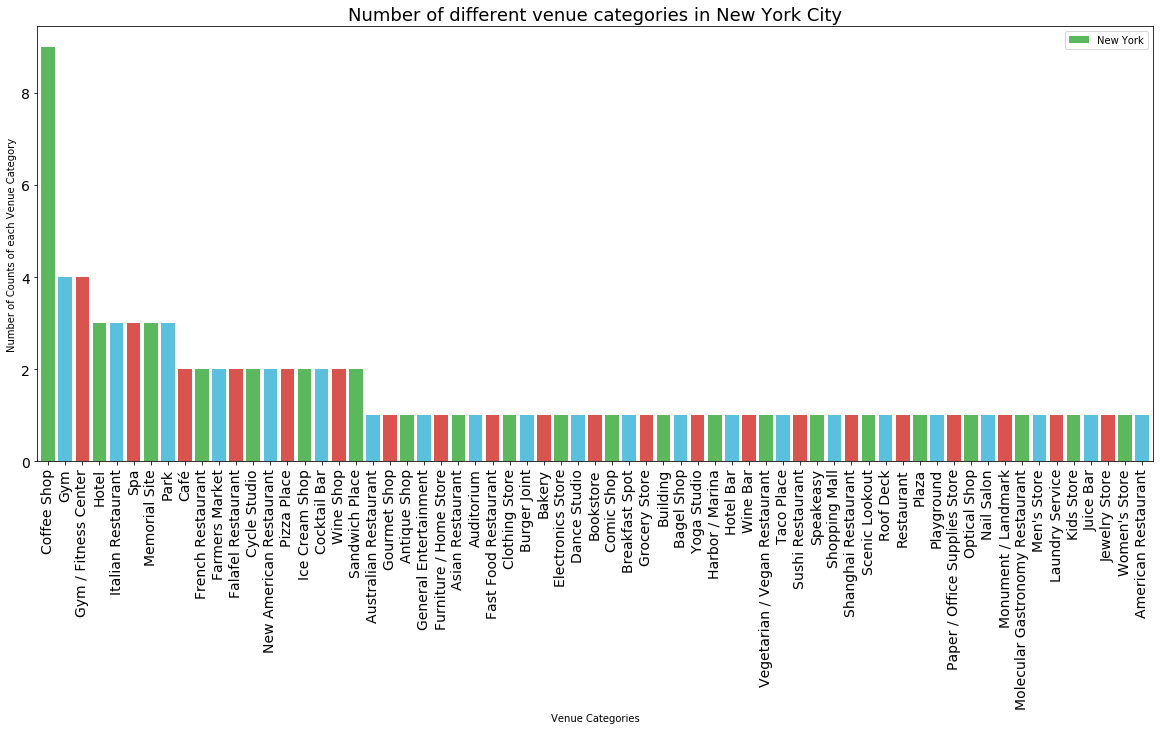

In [477]:
df_NYC.plot(x = 'categories',
                 y = 'New York',
                 kind='bar', 
                 width=0.8,
                 figsize=(20, 8),
                 color=['#5cb85c', '#5bc0de', '#d9534f'],
                 fontsize = 14,
                 )
plt.title('Number of different venue categories in New York City', size = 18)
plt.ylabel('Number of Counts of each Venue Category')
plt.xlabel('Venue Categories')
plt.show()

### Exploring Nearby Areas of London City in United Kingdom

Getting the Location of London, United Kingdom

In [478]:
address = 'London, UK'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

51.5073219 -0.1276474


In [479]:
name = address # neighborhood name
latL = latitude # neighborhood latitude value
lonL = longitude # neighborhood longitude value

print('Latitude and Longitude values of {} are {}, {}.'.format(name, 
                                                               latL, 
                                                               lonL))

Latitude and Longitude values of London, UK are 51.5073219, -0.1276474.


In [480]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
RADIUS = 1000 # defining radius
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, CLIENT_SECRET, VERSION, latL, lonL, RADIUS, LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=GXXD1GVTUKJS0JBDMSG3WRXN2PNCEV34SNEQIJSI4HXEXMO4&client_secret=40NUW1HKHJLRBGD5WOBR4SZRS3FBI4DB340YEGP1ELSP5QJ4&v=20180604&ll=51.5073219,-0.1276474&radius=1000&limit=100'

In [481]:
# getting the result to a json file
results = requests.get(url).json()
'There are {} venues around London neighborhood.'.format(len(results['response']['groups'][0]['items']))

'There are 100 venues around London neighborhood.'

In [482]:
venues = results['response']['groups'][0]['items']
venues[0]

{'reasons': {'count': 0,
  'items': [{'summary': 'This spot is popular',
    'type': 'general',
    'reasonName': 'globalInteractionReason'}]},
 'venue': {'id': '4ac518cdf964a520e6a520e3',
  'name': 'National Gallery',
  'location': {'address': 'Trafalgar Sq',
   'lat': 51.50887601013219,
   'lng': -0.1284778118133545,
   'labeledLatLngs': [{'label': 'display',
     'lat': 51.50887601013219,
     'lng': -0.1284778118133545}],
   'distance': 182,
   'postalCode': 'WC2N 5DN',
   'cc': 'GB',
   'city': 'London',
   'state': 'Greater London',
   'country': 'United Kingdom',
   'formattedAddress': ['Trafalgar Sq',
    'London',
    'Greater London',
    'WC2N 5DN',
    'United Kingdom']},
  'categories': [{'id': '4bf58dd8d48988d18f941735',
    'name': 'Art Museum',
    'pluralName': 'Art Museums',
    'shortName': 'Art Museum',
    'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/museum_art_',
     'suffix': '.png'},
    'primary': True}],
  'photos': {'count': 

In [483]:
dataframe = json_normalize(venues) # flatten JSON

# Define the dataframe columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng', 'venue.location.distance']
dataframe_filteredL = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venues
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filteredL['venue.categories'] = dataframe_filteredL.apply(get_category_type, axis=1)

# clean columns
dataframe_filteredL.columns = [col.split('.')[-1] for col in dataframe_filteredL.columns]

dataframe_filteredL.head(12)


C:\Users\Krishno\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """Entry point for launching an IPython kernel.


,name,categories,lat,lng,distance
0,National Gallery,Art Museum,51.508876,-0.128478,182
1,Trafalgar Square,Plaza,51.507987,-0.128048,79
2,East Trafalgar Square Fountain,Fountain,51.508088,-0.127700,85
3,Corinthia Hotel,Hotel,51.506607,-0.124460,234
4,National Portrait Gallery,Art Gallery,51.509438,-0.128032,237
5,Gordon's Wine Bar,Wine Bar,51.507911,-0.123293,308
6,Horse Guards Parade,Plaza,51.504847,-0.126590,285
7,Whitehall Gardens,Garden,51.506354,-0.122900,346
8,Amorino,Ice Cream Shop,51.510427,-0.128401,349
9,Japan Centre,Japanese Restaurant,51.509761,-0.131273,369


In [484]:
dataframe_filteredL.shape

(100, 5)

In [485]:
print('There are {} uniques categories.'.format(len(dataframe_filteredL['categories'].unique())))

There are 62 uniques categories.


In [486]:
df_LON = dataframe_filteredL.groupby('categories').size().sort_values(ascending = False).reset_index(name = 'London')
df_LON

,categories,London
0,Theater,8
1,Plaza,5
2,Hotel,4
3,Indian Restaurant,3
4,Clothing Store,3
...,...,...
57,Gym,1
58,Grocery Store,1
59,Gourmet Shop,1
60,Gift Shop,1


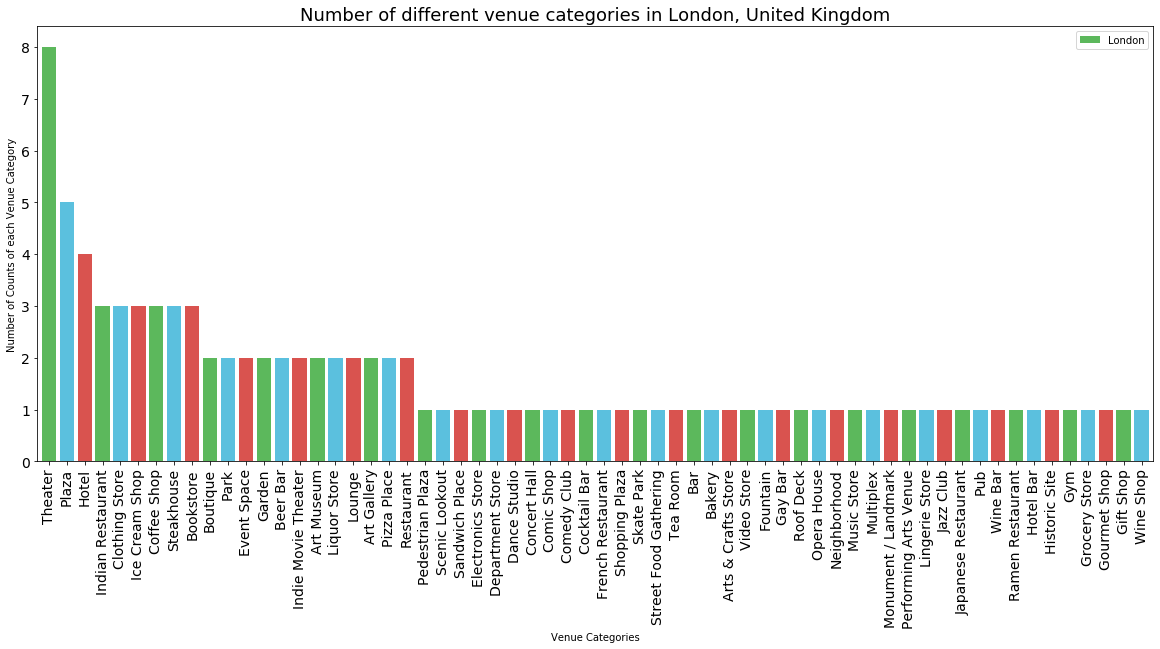

In [487]:
df_LON.plot(x = 'categories',
                 y = 'London',
                 kind='bar', 
                 width=0.8,
                 figsize=(20, 8),
                 color=['#5cb85c', '#5bc0de', '#d9534f'],
                 fontsize = 14,
                 )
plt.title('Number of different venue categories in London, United Kingdom', size = 18)
plt.ylabel('Number of Counts of each Venue Category')
plt.xlabel('Venue Categories')
plt.show()

The combined analysis for the 3 Cities

In [488]:
df_Comb = df_Toronto.merge(df_NYC,on='categories').merge(df_LON,on='categories')
df_Comb

,categories,Toronto,New York,London
0,Coffee Shop,11,9,3
1,Restaurant,4,1,2
2,Gym,2,4,1
3,Hotel,2,3,4
4,Plaza,2,1,5
5,Comic Shop,1,1,1
6,Clothing Store,1,1,3
7,Bookstore,1,1,3
8,Bakery,1,1,1
9,Sandwich Place,1,2,1


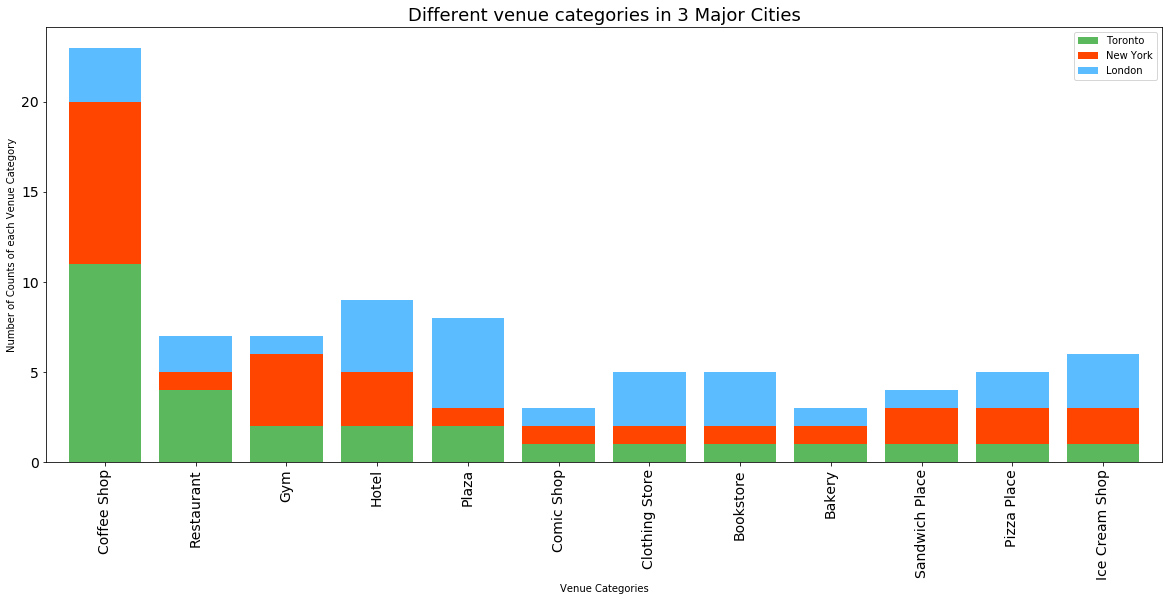

In [489]:
df_Comb.plot(x = 'categories',
                 y = ['Toronto','New York','London'],
                 kind='bar', 
                 stacked = True,
                 width=0.8,
                 figsize=(20, 8),
                 color=['#5cb85c', '#FF4500', '#5bbdff'],
                 fontsize = 14,
                 )
plt.title('Different venue categories in 3 Major Cities', size = 18)
plt.ylabel('Number of Counts of each Venue Category')
plt.xlabel('Venue Categories')
plt.show()